In [1]:
from __future__ import print_function, division

## 프로그래밍을 이용한 이항분포 모의실험

모의실험을 이용하여 동전을 30번 던져서 앞면이 24번 이상 나올 확률이 얼마나 되는지 확인해보자.
일반적으로 그 확률이 5% 이하라고 밝혀지면 앞서 언급한 동전은 정상적이지 않다고 판단하여 영가설(H0)을 기각한다.
즉, 편향된 동전이었다고 결론짓는다.

앞서 이미 이론적으로 그 확률이 5%에 훨씬 미치지 않는다는 것을 확인하였다. 
여기서는 모의실험을 이용하여 동일한 결론에 도달할 수 있음을 보이고자 한다.

### 모의실험: 동전 30번 던지기 

먼저 정상적인 동전을 30번 던지는 모의실험을 코드로 구현하기 위해 아래 아이디어를 활용한다.

* 모의실험에서 1은 앞면(H)를, 0은 뒷면(T)을 의미한다.
* 정상적인 동전을 던진 결과는 임의적으로 결정된다. 
    np.random 모듈의 randint 함수를 이용하여 무작위적으로 0과 1로 구성된, 길이가 30인 어레이를 생성할 수 있다.
    * randint 함수는 해당 구간의 숫자들을 무작위적으로, 하지만 균등하게 생성한다.

np.random.randint 함수는 주어진 구간에서 정수를 지정된 길이만큼 생성해서 어레이로 리턴한다.

아래 코드는 0과 10 사이의 정수를 무작위적으로 5개 생성하여 어레이로 리턴한다.

주의:

* 0은 포함됨
* 10은 포함되지 않음

In [9]:
np.random.randint(0, 10, 5)

array([3, 6, 0, 0, 6])

동전을 30번 던지는 것을 구현하기 위해 이제 0과 1을 무작위적으로 30개 생성하자.

In [32]:
num_tosses = 6

experiment = np.random.randint(1, 7, num_tosses)
mask = experiment == 1

heads = experiment[mask]
heads

len(heads)

1

길이 정보를 아래와 같이 모양의 정보로부터 가져올 수 있다.

In [15]:
heads.shape

(13,)

(13,)은 길이가 1인 튜플 자료형이며, 이는 heads가 1차원 어레이이며, 어레이의 길이가 13이란 의미이다. 
튜플의 인덱싱을 이용하여 heads의 길이, 즉, 앞면이 나온 횟수를 알 수 있다.

In [16]:
heads.shape[0]

13

### 모의실험: 동전 30번 던지기 모의실험 반복하기

앞서 구현한 동전 30번 던지기를 계속해서 반복시키는 모의실험을 구현하자.

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)

In [120]:
def cube_experiment(num_repeat):

    heads_count_array = np.empty([num_repeat,1], dtype=float)
    
    for times in np.arange(num_repeat):
        experiment = np.random.randint(1,7,6)
        heads_count_array[times] = experiment[experiment==1].shape[0]
    
    return heads_count_array.mean()

In [131]:
cube_experiment(30)

1.1000000000000001

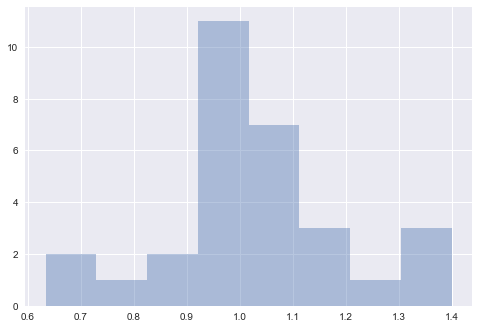

In [152]:
heads_mean = np.empty([30, 1], dtype=float)

for times in np.arange(30):
    heads_mean[times] = cube_experiment(30)


sns.distplot(heads_mean, kde=False)

### 모의실험 결과 그래프로 확인하기

모의실험 결과를 히스트그램으로 확인해볼 수 있다.
여기서는 seaborn 이란 모듈을 활용하여 보다 멋진 그래프를 그리는 법을 기억해두면 좋다.

아래 그래프는 동전 30번 던지기를 1500번 모의실험했을 때 앞면이 나온 횟수를 히스토그램으로 보여준다.

아래 그래프는 커널밀도추정(kde = kernel density estimation) 기법을 적용하여 데이터를
보다 이해하기 쉽도록 도와주는 그래프를 함께 보여준다.

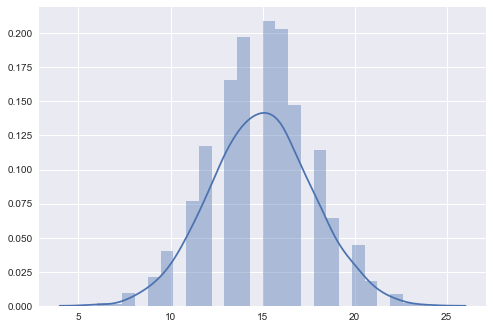

In [24]:
sns.distplot(heads_count_1500, kde=True)

1500번의 모의실험에서 앞면이 24회 이상 나온 실험이 몇 번인지를 확인해보자.
앞서 사용한 기술인 마스크 인덱싱 기술을 활용한다.

**주의:** 앞서 이론적으로 살펴보았을 때 1500번 정도 실험해야 한 번 정도 볼 수 있다고 결론지었음을 기억하라.

In [25]:
# 앞면이 24회 이상 나오는 경우들의 어레이

mask = heads_count_1500>=24
heads_count_1500[mask]

array([24])

이론적으로 예상한 대로 동전을 30번 던져서 앞면이 24회 이상 나온 경우가 한 번 나왔다.

이제 위 모의실험을 10,000번 반복해보자.

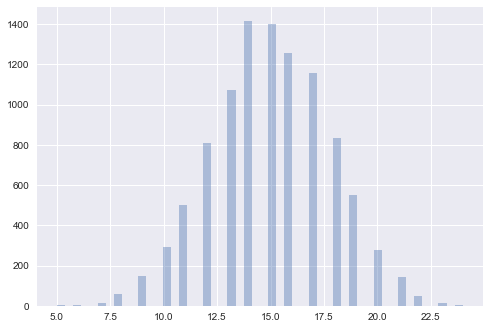

In [26]:
heads_count_10000 = coin_experiment(10000)
sns.distplot(heads_count_10000, kde=False)

In [27]:
# 앞면이 24회 이상 나오는 경우들의 어레이

mask = heads_count_10000>=24
heads_count_10000[mask].shape[0]

4

앞서 확률적으로 0.0007%, 즉 10,000번에 7번 정도 나와야 한다고 이론적으로 계산한 결과와 비슷한 결과가 나온다는 것을 위 실험을 반복적으로 실행하면서 확인해볼 수 있다.

## 정상적인 동전인가?

모의실험의 결과 역시 동전을 30번 던져서 24번 이상 앞면이 나올 확률이 5%에 크게 미치지 못한다.
이런 경우 우리는 사용한 동전이 정상적인 동전이라는 영가설(H0)을 받아들일 수 없다고 말한다.
즉, 기각해야 한다.

가설검정을 위해 지금까지 다룬 내용을 정리하면 다음과 같다.

## 가설검정 6단계

```
1) 검정할 가설을 결정한다.
    * 영가설: 여기서는 "정상적인 동전이다" 라는 가설 사용
2) 가설을 검증할 때 사용할 통계방식을 선택한다. 
    * 여기서는 이항분포 확률 선택
3) 기각역을 정한다.
    * 여기서는 앞면이 나올 횟수를 기준으로 상위 5%로 정함
    * 앞면이 24번 나올 확률이 5% 이상되어야 인정한다는 의미임.
4) 검정통계를 위한 p-값을 찾는다.
    * 여기서는 모의실험을 이용하여 가설에 사용된 사건이 발생한 확률을 계산.
    * 경우에 따라 이론적으로도 계산 가능
5) 표본결과가 기각역 안에 들어오는지 확인한다.
    * 여기서는 5% 이하인지 확인
6) 결정을 내린다.
    * 여기서는 "정상적인 동전이다" 라는 영가설을 기각함.
```

## 연습문제

### 연습

모의실험 반복을 구현하는 coin_experiment 함수를 for문을 사용하지 않고 구현해보자.

견본답안:

In [28]:
def coin_experiment_2(num_repeat):

    experiment = np.random.randint(0,2,[num_repeat, num_tosses])
    return experiment.sum(axis=1)

In [29]:
heads_count = coin_experiment_2(100000)

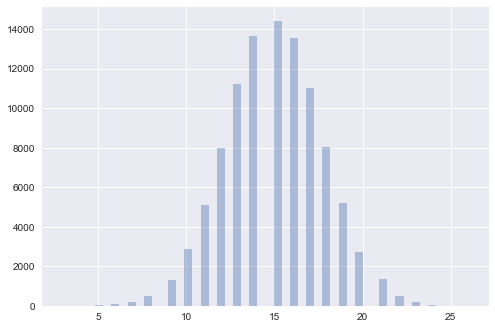

In [30]:
sns.distplot(heads_count, kde=False)

In [31]:
mask = heads_count>=24

In [32]:
heads_count[mask].shape[0]/100000

0.00077

### 연습

numpy.random 모듈에 지금까지 다룬 이항분포 확률을 계산해주는 함수인 binomial이 이미 구현되어 있다.

In [33]:
from numpy.random import binomial

아래 코드는 B(30, 0.5)를 따르는 확률변수를 10,000번 반복한 결과를 보여준다.

In [34]:
an_experiment = binomial(30, 0.5, 10000)
an_experiment

array([18, 11, 14, ..., 14, 22, 15])

위 결과를 이용하여 앞서 분석한 결과와 유사한 결과를 얻는다는 것을 확인할 수 있다.

In [35]:
an_experiment[an_experiment>=24].shape[0]

6